# Solution of assignment "Multiple Scattering"
This is the coded solution.

### Part one: only Coulomb scatterers 
The scattering angle is following a uniform distrinution, centered at zero and of spread -$\theta_\text{max}$ to +$\theta_\text{max}$.
How the data got generated:

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

%reload_ext autoreload
import toyTracker as tk

#==================================================================
# GENERATING THE DATA 
finalDevs = [] 

#==================================================================
# THE UKNOWN PARAMETER:
# Parameter theta_max for the uniform deflected angle on each layer:
theta_max = 3.8
N_tracks  = 2000
#==================================================================
# Config of toy tracker:
minx      = -2.
maxx      = +2.
N_layers  =  12
#==================================================================
# Plotting tools
colors    = ['navy', 'blue', 'royalblue', 'deepskyblue', 'skyblue']
histoConf = dict(histtype='stepfilled', color='deepskyblue', alpha=0.75 , ec="k")
fig, ax   = tk.buildDetector(N_layers, minx, maxx)
nBins     = 200
#==================================================================
# Function to get the deflection:
def getDeflectionWithAngle(angleInDegrees, distanceLayers=1):

    deflection = np.tan(np.deg2rad(angleInDegrees)) * distanceLayers

    return deflection

#==================================================================

# Loop over tracks:
for t in range(N_tracks):
    
    trackXvals = []   # storing the current track X coordinates
    trackYvals = []   # storing the current track Y corrdinates
    thetaIvals = []   # storing the deflected angles
    
    # source of particle hits first layer at detector origin with incident angle 0
    x0      = 0
    y0      = 0
    theta0  = 0

    trackXvals.append(x0)
    trackYvals.append(y0)
    thetaIvals.append(theta0)
    
    for l in range(N_layers):

        # Get track coordinate at current layer l
        x_layer = trackXvals[-1]
        y_layer = trackYvals[-1]
        i_theta = thetaIvals[-1]

        # Compute scattering angle to get the deflection at layer 'l + 1' 
        new_angle = 2 * theta_max * random.uniform(0 , 1) - theta_max
        
        # Compute the horizontal deviation (deltaX) on next layer: 
        deviation = getDeflectionWithAngle(new_angle)

        # Store coordinates on next layer
        y_next = y_layer + 1
        x_next = x_layer + deviation
        trackYvals.append( y_next )
        trackXvals.append( x_next )
        thetaIvals.append( new_angle )

        # If on the last layer, store the final deviation (for histogramming later)
        if l == N_layers - 1:
            finalDevs.append( x_next )
        
    #----------------------------------------------
    # Done with track, let's plot it!
    #----------------------------------------------
    ax[0].plot( trackXvals, trackYvals, color=colors[t%len(colors)])

    # Print info:
    if(t%100==0):
        print("   Track i = % 4d\tFinal angle = %.1f\tDefletion = %.3f" %(t, new_angle, x_next))

# Plot distribution on deflection plot

n, binArray, patches = ax[1].hist(finalDevs, nBins, range=[minx, maxx],  **histoConf)

fig.tight_layout()
fig.canvas.draw()
fig.savefig("tracker_CoulombScatt_%d_tracks.png"%N_tracks)



   Track i =    0	Final angle = -1.0	Defletion = 0.008
   Track i =  100	Final angle = -3.7	Defletion = 0.096
   Track i =  200	Final angle = -1.6	Defletion = 0.086
   Track i =  300	Final angle = 0.3	Defletion = -0.013
   Track i =  400	Final angle = 0.1	Defletion = -0.128
   Track i =  500	Final angle = 1.1	Defletion = 0.063
   Track i =  600	Final angle = -1.9	Defletion = -0.164
   Track i =  700	Final angle = 3.0	Defletion = 0.079
   Track i =  800	Final angle = -0.1	Defletion = -0.073
   Track i =  900	Final angle = -3.4	Defletion = -0.163
   Track i =  1000	Final angle = -1.9	Defletion = -0.218
   Track i =  1100	Final angle = 3.4	Defletion = 0.193
   Track i =  1200	Final angle = -1.0	Defletion = 0.013
   Track i =  1300	Final angle = 2.8	Defletion = -0.169
   Track i =  1400	Final angle = 2.8	Defletion = -0.254
   Track i =  1500	Final angle = 2.6	Defletion = 0.018
   Track i =  1600	Final angle = 1.5	Defletion = -0.111
   Track i =  1700	Final angle = 2.8	Defletion = 0.266
   

Let's save the data in a text file.

In [2]:
for i in range(len(finalDevs)):
    if i%100==0:
        print("track%05d\t%.5f"%(i, finalDevs[i]))

track00000	0.00774
track00100	0.09560
track00200	0.08622
track00300	-0.01284
track00400	-0.12792
track00500	0.06304
track00600	-0.16388
track00700	0.07886
track00800	-0.07273
track00900	-0.16314
track01000	-0.21796
track01100	0.19252
track01200	0.01275
track01300	-0.16924
track01400	-0.25395
track01500	0.01822
track01600	-0.11074
track01700	0.26589
track01800	-0.11411
track01900	-0.00241


Let's try several values of $\theta_\text{max}$ to reproduce the distribution of the lower pad.

For convenience, I 'packed' all the code above in a dedicated function, which I saved in a special file called TrackerSimulator.py (have a look!). It's a sort of a library.

I will import it and generate a guessed distribution for a guessed $\theta_\text{max}$ of 10 degrees.


Getting observation data points. The 5 first observed deflections are:
[0.0739, 0.05978, 0.00199, 0.01386]
Last two ones:
[0.04347, -0.06274]


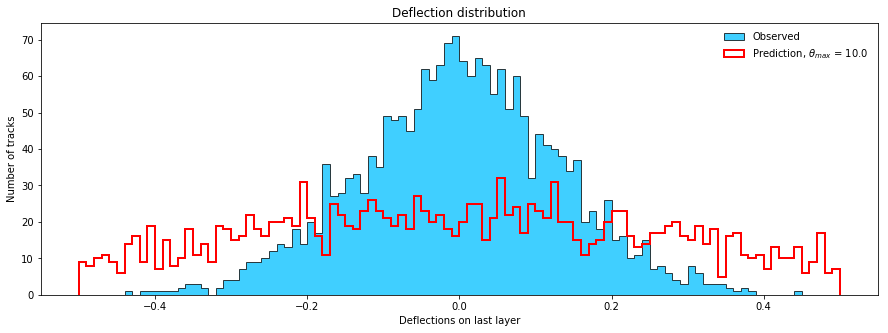

In [18]:
%reload_ext autoreload
import toyTracker as tk
import TrackerSimulator as tkSim


#============== Retrieving the data 
def Read_Two_Column_File(file_name):
    with open(file_name, 'r') as data:
        col1 = []
        col2 = []
        for line in data:
            p = line.split()
            col1.append(str(p[0]))
            col2.append(float(p[1]))
    return col1, col2

trackIDs, obsDeflections = Read_Two_Column_File("data_tracker_run1.txt")

#=============== Test! Print some values:
print("Getting observation data points. The 5 first observed deflections are:")
print(obsDeflections[0:4])
print("Last two ones:")
print(obsDeflections[-3:-1])

#=============== Generate guesses:
theta_max_guess = 10
nBins2 = 100

guessDeflections = tkSim.getDeflectionsAllTracksCoulomb( N_layers, N_tracks, theta_max_guess )

fig2 = plt.figure(figsize=(15,5))
plt.title('Deflection distribution')
plt.xlabel('Deflections on last layer')
plt.ylabel('Number of tracks')
# Overlaying data (D) and guessed (G) distribution
nD, binArrayD, patchesD = plt.hist(obsDeflections,   nBins2, label='Observed', range=[minx, maxx],**histoConf)
nG, binArrayG, patchesG = plt.hist(guessDeflections, nBins2, label=r'Prediction, $\theta_{max}$ = %.1f'%theta_max_guess, range=[minx, maxx], color='red', histtype='step', lw=2)
plt.legend(frameon=False)
fig2.show()


Let's get many guesses.
For each of them, let's compute the sum of the $\chi^2$ between the tested distribution and the observation.

In [19]:
def getSumChiSquared(listPredictions, listObservations, nb_bins, minx, maxx):
    
    # Check of my inputs:
    if len(listPredictions) < 1 or len(listObservations) < 1 or nb_bins < 1:
        print("Problem with sizes of inputs. Check. Returning -1.")
        return -1
    
    # Let's bin the list. I use the numpy methods.
    histPreds, binEdges  = np.histogram(listPredictions,  nb_bins, range=[minx, maxx])
    histObs  , binEdges2 = np.histogram(listObservations, nb_bins, range=[minx, maxx])
    
    sumChi2 = 0
    
    for i in range(len(histPreds)):
        
        if histPreds[i] == 0:
            currentChi2 = 0
        else:
            currentChi2 = ((histPreds[i] - histObs[i])**2)/(histPreds[i])
            sumChi2 += currentChi2
            
    return sumChi2

#==================================
# T E S T
#==================================
pre = [1,1,0,0,2,2,3,3,3,3,3]
obs = [1,1,1,0,2,2,3,3,3,3]
sum2ChiTest = getSumChiSquared(pre, obs, 4, 0., 3.)
# binned histo:
# pre : [2 2 2 5]
# obs : [1 3 2 4]
# sumChi2 = 1/2 + 1/2 + 1/5 = 1.20  
print("My summed chi squared is %.2f"%sum2ChiTest)

My summed chi squared is 1.20


Seems good!

Now let's compute the sum of $\chi^2$ for several sets of predictions. I know the angle is expected to be small. So my first guess at 10 degree seems too large. 

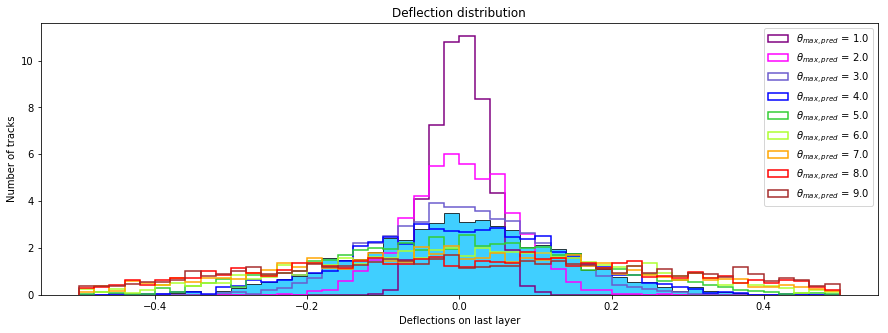

In [20]:
# Trying some values of theta_max:
theta_max_preds = [1, 2, 3, 4, 5, 6, 7, 8, 9]
sumChi2_preds   = []    # for minimalization later

nBins2 = 50
minx = -0.5
maxx = +0.5

fig3 = plt.figure(figsize=(15,5))
plt.title('Deflection distribution')
plt.xlabel('Deflections on last layer')
plt.ylabel('Number of tracks')

# Plot the data:
nD, binArrayD, patchesD = plt.hist(obsDeflections, nBins2, range=[minx, maxx], density=True, **histoConf)

# For plotting the guessed distributions, let's  let's color each distrib:
colors = ['purple', 'magenta', 'slateblue', 'blue', 'limegreen', 'greenyellow', 'orange', 'red', 'brown']

for i in range(len(theta_max_preds)):
    
    # Shoot tracks and create the distribution
    finalDevs_thisPred = tkSim.getDeflectionsAllTracksCoulomb( N_layers, N_tracks, theta_max_preds[i] )
    
    # Compare with the observation:
    current_sumChi2 = getSumChiSquared(finalDevs_thisPred, finalDevs, nBins2, minx, maxx)
    # I divide by the number of bins in the histogram (known as number of degrees of freedom, ndf)
    sumChi2_preds.append(current_sumChi2/nBins2)
    
    legendTag = r"$\theta_{max, pred}$ = %.1f" %(theta_max_preds[i])
    
    # Plot this:
    nD, binArrayD, patchesD = plt.hist(finalDevs_thisPred, nBins2, label=legendTag, range=[minx, maxx], density=True, color=colors[i%len(colors)], histtype='step', lw=1.5)

plt.legend()
fig3.show()
  

Seems pretty good around 4 degrees.
How do the summed $\chi^2$ look like?

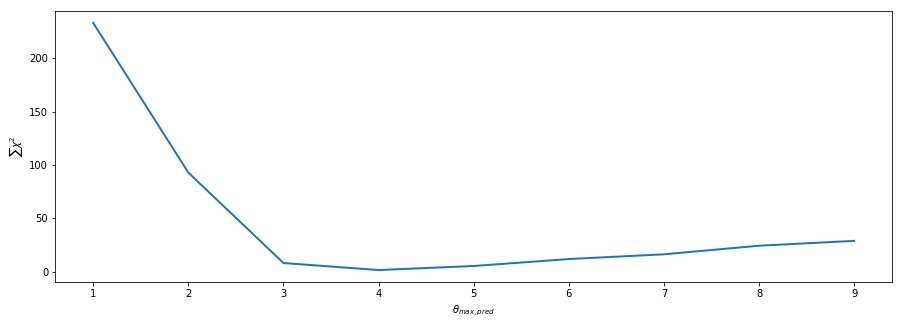

In [21]:
fig = plt.figure(figsize=(15,5))
plt.plot(theta_max_preds, sumChi2_preds, lw=2)
plt.xlabel(r"$\theta_{max,pred}$")
plt.ylabel(r"$\sum \chi^2$")
fig.savefig("graph_sumChi2_vs_predThetas.png")

Let's 'normalize' this plot by dividing the sum $\chi^2$ with the number of degrees of freedom.

Let's do the same but with 'zoom' around 4 degrees:

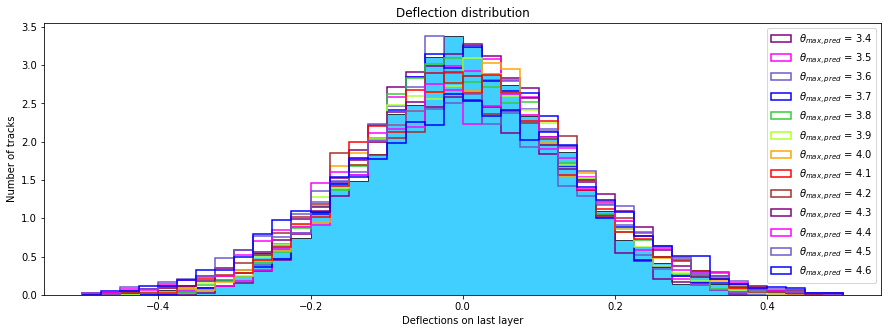

In [22]:
# Trying some values of theta_max:
theta_max_preds = [  3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6 ]
sumChi2_preds   = []    # for minimalization later

nBins2 = 40
minx = -0.5
maxx = +0.5

fig3 = plt.figure(figsize=(15,5))
plt.title('Deflection distribution')
plt.xlabel('Deflections on last layer')
plt.ylabel('Number of tracks')

# Plot the data:
nD, binArrayD, patchesD = plt.hist(obsDeflections, nBins2, range=[minx, maxx], density=True, **histoConf)

# For plotting the guessed distributions, let's  let's color each distrib:
colors = ['purple', 'magenta', 'slateblue', 'blue', 'limegreen', 'greenyellow', 'orange', 'red', 'brown']

for i in range(len(theta_max_preds)):
    
    # Shoot tracks and create the distribution
    finalDevs_thisPred = tkSim.getDeflectionsAllTracksCoulomb( N_layers, 2*N_tracks, theta_max_preds[i] )
    
    # Compare with the observation:
    current_sumChi2 = getSumChiSquared(finalDevs_thisPred, finalDevs, nBins2, minx, maxx)
    # I divide by the number of bins in the histogram (known as number of degrees of freedom, ndf)
    sumChi2_preds.append(current_sumChi2/nBins2)
    
    legendTag = r"$\theta_{max, pred}$ = %.1f" %(theta_max_preds[i])
    
    # Plot this:
    nD, binArrayD, patchesD = plt.hist(finalDevs_thisPred, nBins2, label=legendTag, range=[minx, maxx], color=colors[i%len(colors)], density=True, histtype='step', lw=1.5)

plt.legend()
fig3.show()

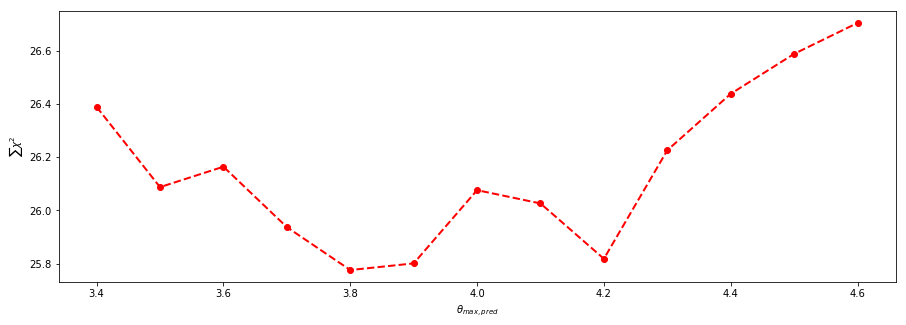

In [10]:
fig = plt.figure(figsize=(15,5))
plt.plot(theta_max_preds, sumChi2_preds, '--ro', lw=2)

plt.xlabel(r"$\theta_{max,pred}$")
plt.ylabel(r"$\sum \chi^2$")
fig.savefig("graph_sumChi2_vs_predThetas_zoomedIn.png")

We found our parameter to model the tracker for this part.
We can refine a last time. Instead of 5 $N_\text{tracks}$ I will use 10 $N_\text{tracks}$.

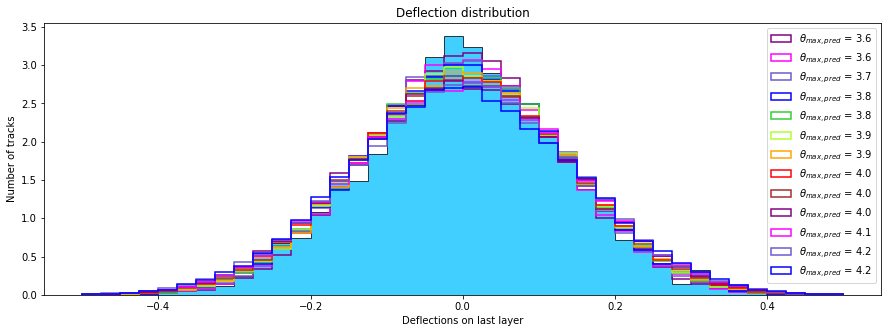

In [33]:
# Trying some values of theta_max:
theta_max_preds = [  3.6, 3.65, 3.7, 3.75, 3.8, 3.85, 3.90, 3.95, 4.00, 4.05, 4.10, 4.15, 4.20 ]
sumChi2_preds   = []    # for minimalization later

nBins2 = 40
minx = -0.5
maxx = +0.5

fig3 = plt.figure(figsize=(15,5))
plt.title('Deflection distribution')
plt.xlabel('Deflections on last layer')
plt.ylabel('Number of tracks')

# Plot the data:
nD, binArrayD, patchesD = plt.hist(obsDeflections, nBins2, range=[minx, maxx], density=True, **histoConf)

# For plotting the guessed distributions, let's  let's color each distrib:
colors = ['purple', 'magenta', 'slateblue', 'blue', 'limegreen', 'greenyellow', 'orange', 'red', 'brown']

for i in range(len(theta_max_preds)):
    
    # Shoot tracks and create the distribution
    finalDevs_thisPred = tkSim.getDeflectionsAllTracksCoulomb( N_layers, 20*N_tracks, theta_max_preds[i] )
    
    # Compare with the observation:
    current_sumChi2 = getSumChiSquared(finalDevs_thisPred, finalDevs, nBins2, minx, maxx)
    # I divide by the number of bins in the histogram (known as number of degrees of freedom, ndf)
    sumChi2_preds.append(current_sumChi2/nBins2)
    
    legendTag = r"$\theta_{max, pred}$ = %.1f" %(theta_max_preds[i])
    
    # Plot this:
    nD, binArrayD, patchesD = plt.hist(finalDevs_thisPred, nBins2, label=legendTag, range=[minx, maxx], color=colors[i%len(colors)], density=True, histtype='step', lw=1.5)

plt.legend()
fig3.show()

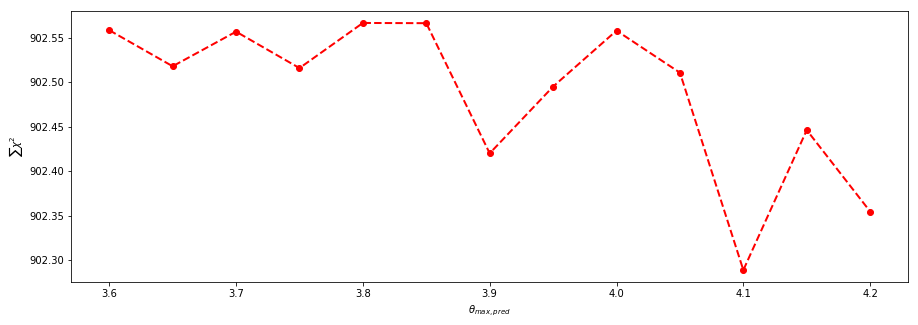

In [34]:
fig = plt.figure(figsize=(15,5))
plt.plot(theta_max_preds, sumChi2_preds, '--ro', lw=2)

plt.xlabel(r"$\theta_{max,pred}$")
plt.ylabel(r"$\sum \chi^2$")
fig.savefig("graph_sumChi2_vs_predThetas_zoomedIn2.png")